# Business case : Whether or not the teacher assistant is a native English speaker or a non-English speaker

The data consist of evaluations of teaching performance over three regular semesters and two summer semesters of 151 teaching assistant (TA) assignments at the Statistics Department of the University of Wisconsin-Madison. The scores were divided into 3 roughly equal-sized categories ("low", "medium", and "high") to form the class variable


Attribute Information:

1) Whether of not the TA is a native English speaker (binary) 1=English speaker, 2=non-English speaker
2) Course instructor (categorical, 25 categories)
3) Course (categorical, 26 categories)
4) Summer or regular semester (binary) 1=Summer, 2=Regular
5) Class size (numerical)
6) Class attribute (categorical) 1=Low, 2=Medium, 3=High

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
# naming the columns because there is no column header in the dataset
data = pd.read_csv("tae.csv",names=['native_speaker', 'instructor', 'course', 'semester', 'class_size', 'attribute'])

## Basic Checks

In [3]:
data.head()

,native_speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [4]:
data.tail()

,native_speaker,instructor,course,semester,class_size,attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   native_speaker  151 non-null    int64
 1   instructor      151 non-null    int64
 2   course          151 non-null    int64
 3   semester        151 non-null    int64
 4   class_size      151 non-null    int64
 5   attribute       151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [6]:
data.describe()

,native_speaker,instructor,course,semester,class_size,attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [7]:
data.shape

(151, 6)

## Exploratory Data Analysis

In [ ]:
#Step 1 Univariate Analysis :# Aanalyzing features - visualization

In [ ]:
#installing sweetviz library
!pip install sweetviz

In [ ]:
import sweetviz as sv #importing sweetviz library
my_report = sv.analyze(data) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html

Points :

1) Course 3 has been taken by 30% of the classes
2) More than 80% of the courses are in the Regular batch and the rest in the Summer batch
3) Largest Class Size has 66 students and the class with the lowest students has 3 students

In [8]:
# Step 2 Bivariate Analysis

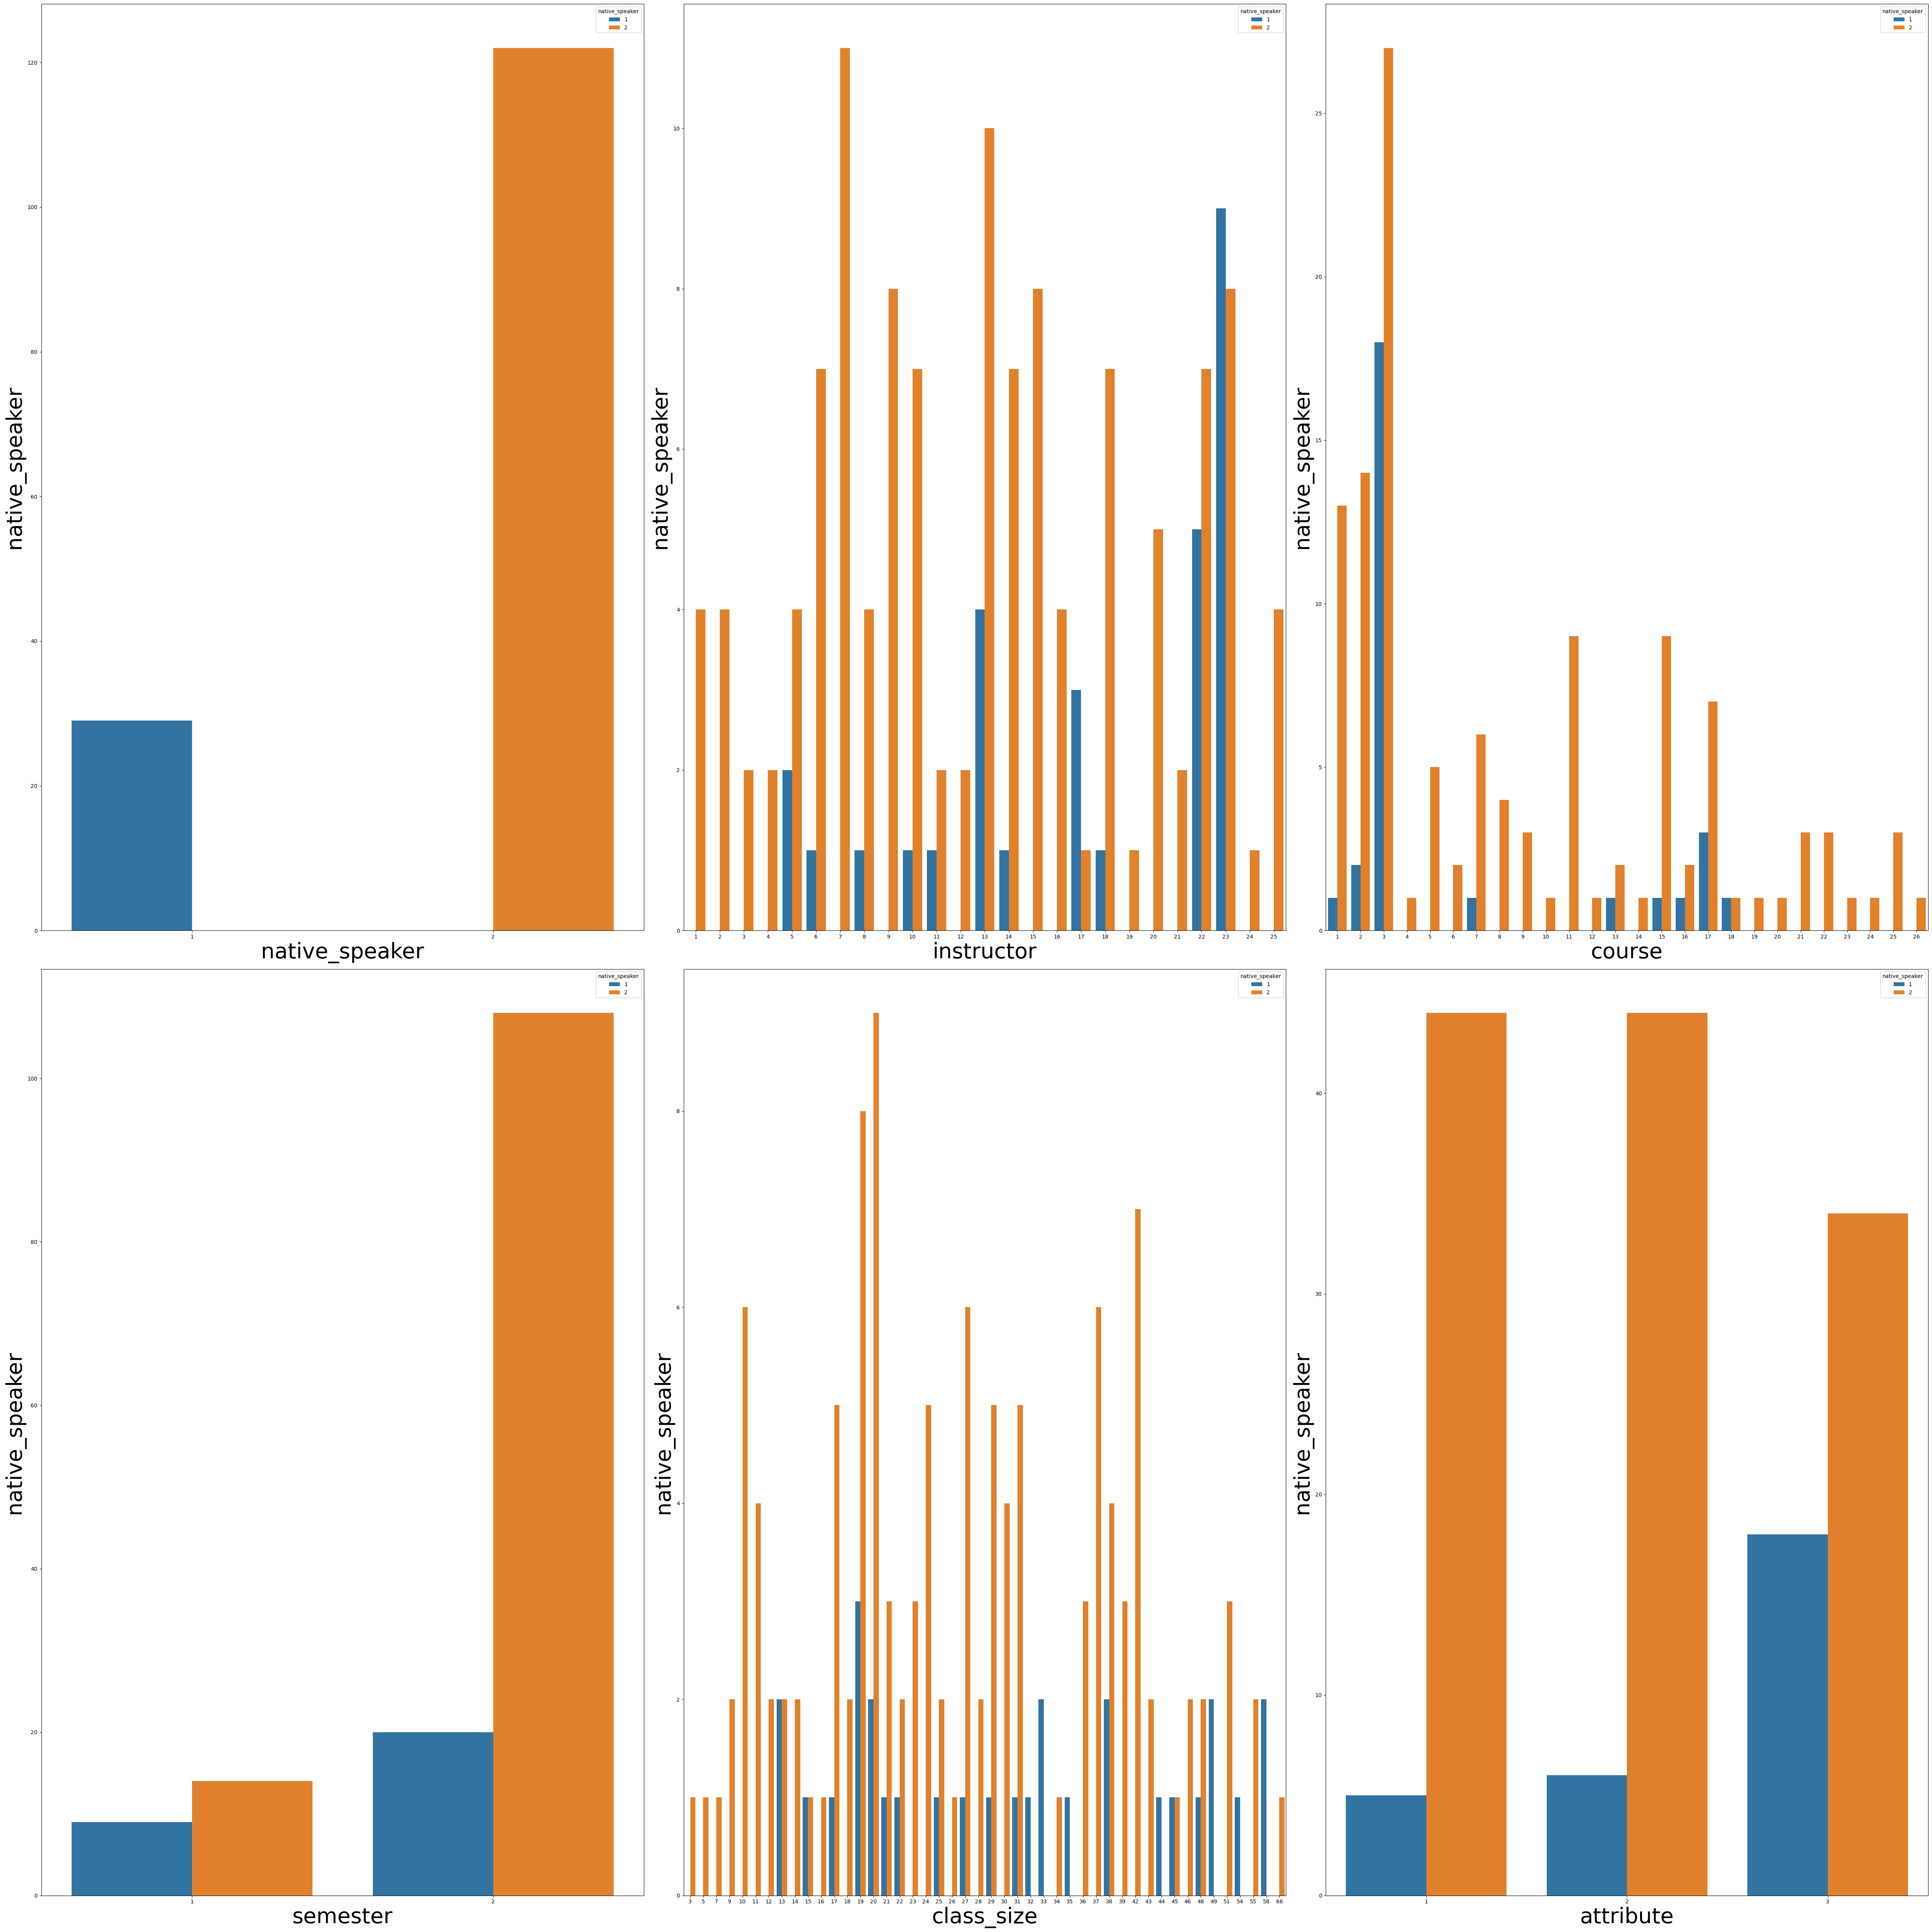

In [10]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(50,50), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(2,3,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data[column].dropna(axis=0)#plotting count plot
                        ,hue=data.native_speaker)
        plt.xlabel(column,fontsize=40)#assigning name to x-axis and increasing it's font
        plt.ylabel('native_speaker',fontsize=40)#assigning name to y-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

Points :

1) Most courses are taught be non English speaking TAs
2) Most Instructors are non English speakers

## Data Preprocessing and Feature Engineering

In [11]:
# Step 1-Finding missing values
data.isnull().sum()

native_speaker    0
instructor        0
course            0
semester          0
class_size        0
attribute         0
dtype: int64

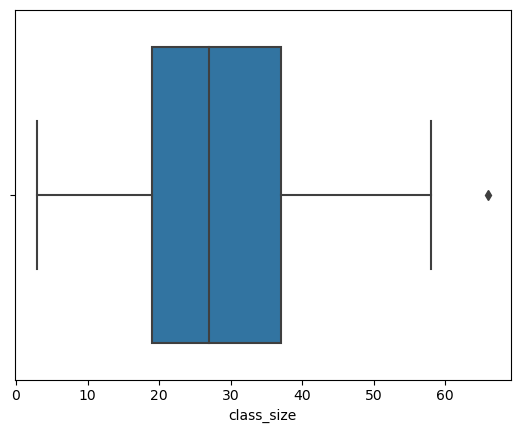

In [12]:
# Step 2 Checking the outlier
sns.boxplot(x='class_size',data=data)
plt.show()

In [13]:
# Replace the outlier with median
data.loc[data['class_size']>60,'class_size']=data['class_size'].median()

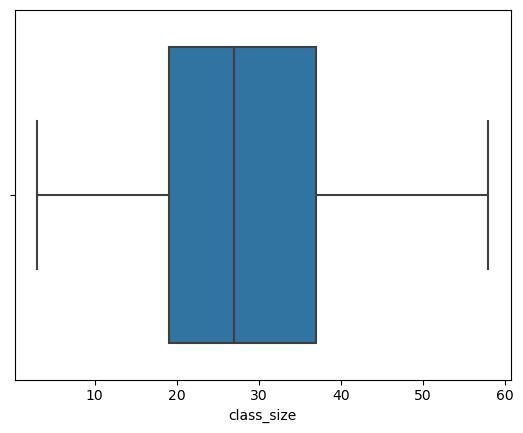

In [14]:
sns.boxplot(x='class_size',data=data)
plt.show()

In [15]:
# Step 4 Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
data.class_size=sc.fit_transform(data[['class_size']])

In [16]:
data.head()

,native_speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,0.290909,3
1,2,15,3,1,0.254545,3
2,1,23,3,2,0.836364,3
3,1,5,2,2,0.545455,3
4,2,7,11,2,0.945455,3


In [ ]:
# Step 5 Transformation

In [17]:
data.loc[data['native_speaker']==1, 'native_speaker']=1
data.loc[data['native_speaker']==2, 'native_speaker']=0
data.head()

,native_speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,0.290909,3
1,0,15,3,1,0.254545,3
2,1,23,3,2,0.836364,3
3,1,5,2,2,0.545455,3
4,0,7,11,2,0.945455,3


In [18]:
data.loc[data['semester']==1, 'semester']=1
data.loc[data['semester']==2, 'semester']=0
data.head()

,native_speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,0.290909,3
1,0,15,3,1,0.254545,3
2,1,23,3,0,0.836364,3
3,1,5,2,0,0.545455,3
4,0,7,11,0,0.945455,3


# Model Comparison Report

## Model Creation

In [20]:
#Step 1 Reorganizinf the features
X = data.iloc[:,1:]
y = data.native_speaker

In [21]:
X

,instructor,course,semester,class_size,attribute
0,23,3,1,0.290909,3
1,15,3,1,0.254545,3
2,23,3,0,0.836364,3
3,5,2,0,0.545455,3
4,7,11,0,0.945455,3
...,...,...,...,...,...
146,3,2,0,0.418182,1
147,10,3,0,0.163636,1
148,18,7,0,0.818182,1
149,22,1,0,0.872727,1


In [22]:
y

0      1
1      0
2      1
3      1
4      0
      ..
146    0
147    0
148    1
149    0
150    0
Name: native_speaker, Length: 151, dtype: int64

In [23]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [24]:
# Step 3 and 4 :  Creating models and their evaluation

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [27]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23  4]
 [ 2  2]]


In [28]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.8064516129032258

In [29]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.8443010752688171

In [31]:
f1score=f1_score(y_test,y_pred,average='weighted')
f1score

0.8220843672456576

In [30]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.33      0.50      0.40         4

    accuracy                           0.81        31
   macro avg       0.63      0.68      0.64        31
weighted avg       0.84      0.81      0.82        31



### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [35]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  1]
 [ 3  1]]


In [36]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.8709677419354839

In [37]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.8453837597330367

In [38]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.50      0.25      0.33         4

    accuracy                           0.87        31
   macro avg       0.70      0.61      0.63        31
weighted avg       0.85      0.87      0.85        31



### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [42]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[27  0]
 [ 2  2]]


In [43]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.9354838709677419

In [44]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.9399332591768632

In [45]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.50      0.67         4

    accuracy                           0.94        31
   macro avg       0.97      0.75      0.82        31
weighted avg       0.94      0.94      0.93        31



### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

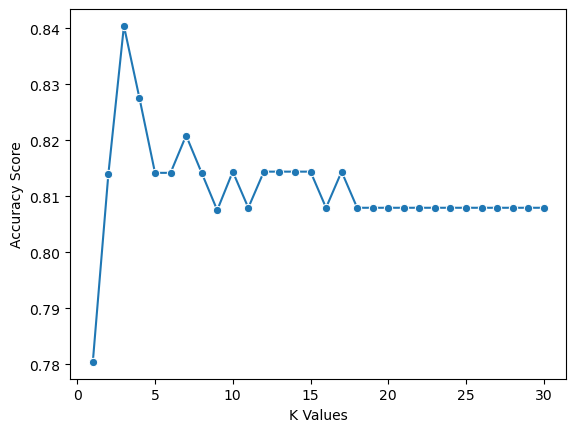

In [47]:
import seaborn as sns
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [48]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
# Predict
y_pred = knn.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [51]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[25  2]
 [ 2  2]]


In [52]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.8709677419354839

In [53]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.8709677419354839

In [54]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.50      0.50      0.50         4

    accuracy                           0.87        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.87      0.87      0.87        31



# CONCLUSION

#### According to the results of all machine learning model used in this business case, the outputs of Random Forest Classifier gives the best performing model.
* recall : 94%
* precesion : 94%
* f1_score : 93%

# Report on Challenges faced

<p> At the beginning of importing our database, there were no headers for the columns. We had to work with one less line. </p>
<p>Then, we chose the target variable incorrectly, instead of choosing the first column as the target, we chose class_attribute. <p>After that, we didn't know if we should use encoding techniques for the two variables: course and course_instructor.

Furthermore, we used orange tool to see which model gives us the best score. it was easy and funny. 

Finally, we learned a lot through this first project and we had applied several techniques and we had done a lot of research work, especially on the encoding techniques that we didn't use for this project. 